In [1]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import os

%matplotlib inline

Welcome to JupyROOT 6.12/06


Let's get the versions numbers we want to create comparison plots of. These should have already had all of the plots generated using the productionFeedback module.

In [2]:
versionNumbers = ["v9_05_00","v9_05_00"]
versionPaths = ["./images/"+x+"/" for x in versionNumbers]
print(versionNumbers)

['v9_05_00', 'v9_05_00']


Lets first look at the farlineHistograms canvas

In [17]:
histVec = []
for i, versionPath in enumerate(versionPaths):
    print(versionPath)
    f = r.TFile(versionPath+versionNumbers[i]+"_farlineHistograms.root")
    f.ls()
    c = f.Get("c")
#    c.Draw()
    prims = list(c.GetListOfPrimitives())
    for x in prims:
        #print(list(x.GetListOfPrimitives())[1])
        h = list(x.GetListOfPrimitives())[1].Clone()
        h.SetDirectory(0)
        histVec.append(h)
        print(h)
    
    f.Close()
print(histVec)

./images/v9_05_00/
<ROOT.TH1D object ("allCaloEnergies") at 0x7fffe7f2a870>
<ROOT.TH1D object ("allCaloWiggle") at 0x7fffe7f28db0>
<ROOT.TH1D object ("allCaloTimes") at 0x7fffe7f2b4c0>
<ROOT.TH1D object ("farlineCTag") at 0x7fffe7ec79d0>
./images/v9_05_00/
<ROOT.TH1D object ("allCaloEnergies") at 0x7fffe7f785b0>
<ROOT.TH1D object ("allCaloWiggle") at 0x7fffe7f79260>
<ROOT.TH1D object ("allCaloTimes") at 0x7fffe7f796c0>
<ROOT.TH1D object ("farlineCTag") at 0x7fffe7f79b20>
[<ROOT.TH1D object ("allCaloEnergies") at 0x7fffe7f2a870>, <ROOT.TH1D object ("allCaloWiggle") at 0x7fffe7f28db0>, <ROOT.TH1D object ("allCaloTimes") at 0x7fffe7f2b4c0>, <ROOT.TH1D object ("farlineCTag") at 0x7fffe7ec79d0>, <ROOT.TH1D object ("allCaloEnergies") at 0x7fffe7f785b0>, <ROOT.TH1D object ("allCaloWiggle") at 0x7fffe7f79260>, <ROOT.TH1D object ("allCaloTimes") at 0x7fffe7f796c0>, <ROOT.TH1D object ("farlineCTag") at 0x7fffe7f79b20>]
TFile**		./images/v9_05_00/v9_05_00_farlineHistograms.root	
 TFile*		./images

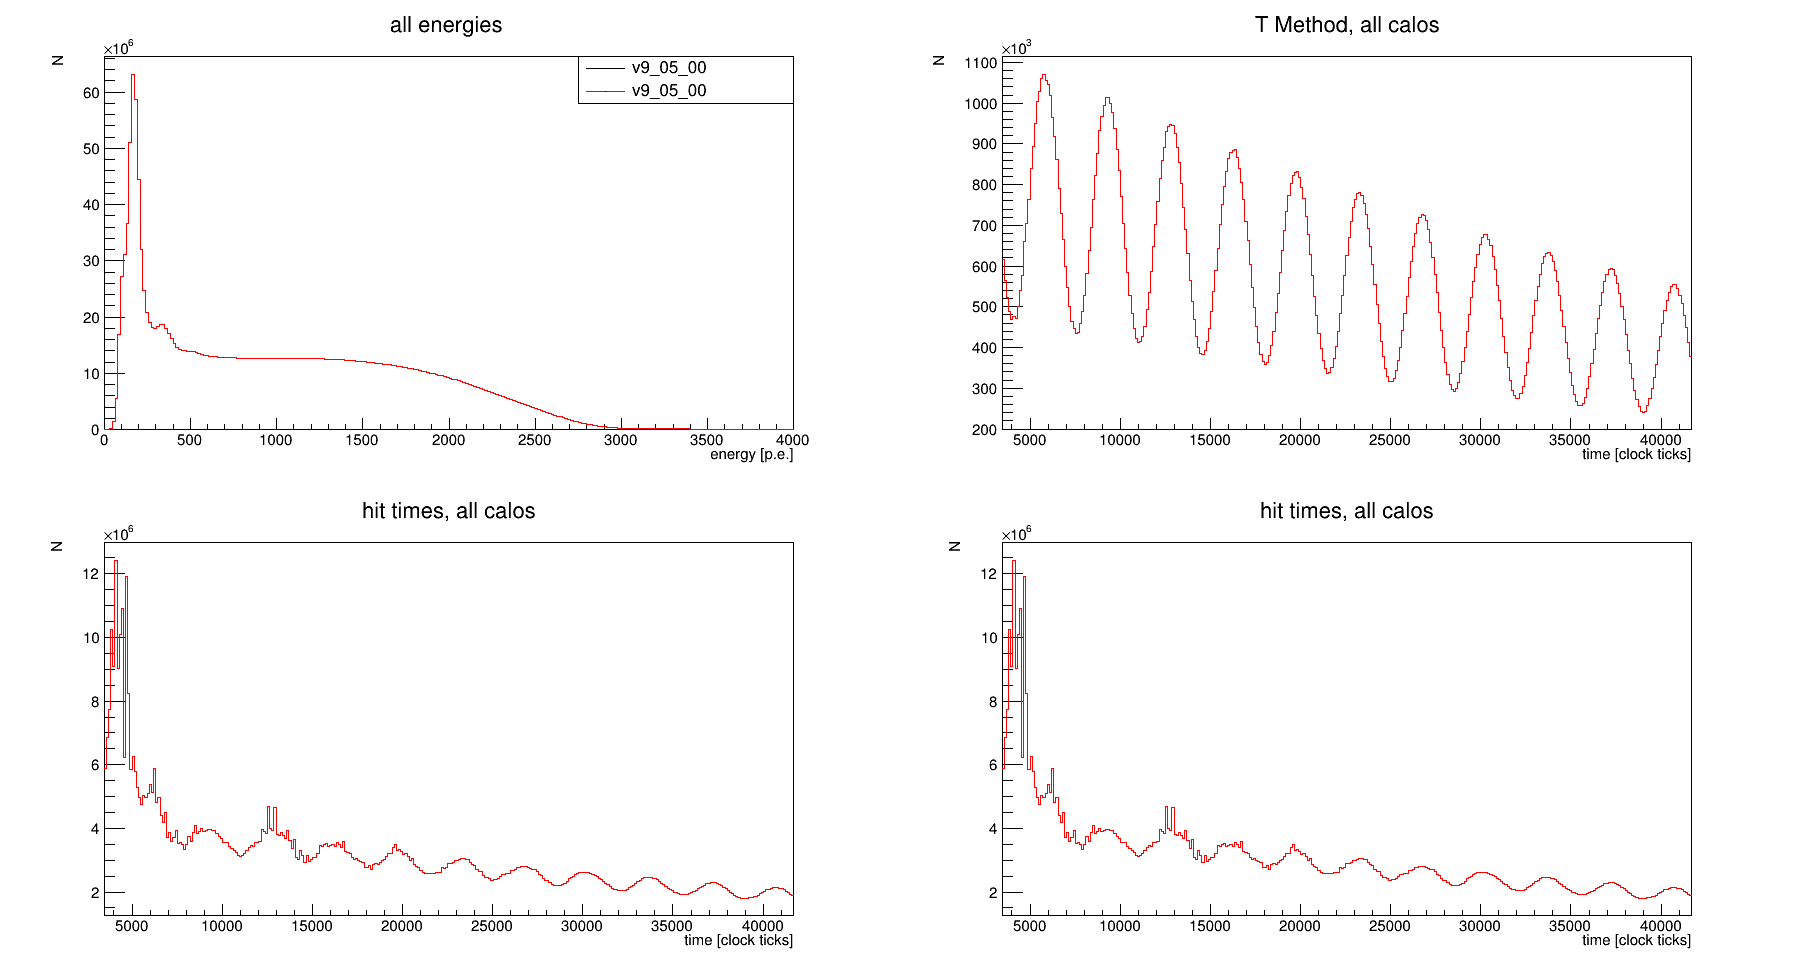

In [18]:
n = len(versionPaths)
c = r.TCanvas("cNew","cNew",1800,1000)
c.Divide(2,2)

for i in range(len(versionPaths)):
    c.cd(1)
    leg = r.TLegend(0.65,0.8,0.9,0.9)
    for version in range(n):
        histVec[version*4+0].SetLineColor(version+1)
        if(version<0.9):
            histVec[version*4+0].Draw()
        else:
            histVec[version*4+0].Draw("SAME")
        leg.AddEntry(histVec[version*4+0],versionNumbers[i],"pl")
    leg.Draw()
        
    c.cd(2)
    for version in range(n):
        histVec[version*4+1].SetLineColor(version+1)
        if(version<0.9):
            histVec[version*4+1].Draw()
        else:
            histVec[version*4+1].Draw("SAME")
            
    c.cd(3)
    for version in range(n):
        histVec[version*4+2].SetLineColor(version+1)
        if(version<0.9):
            histVec[version*4+2].Draw()
        else:
            histVec[version*4+2].Draw("SAME")
            
    c.cd(4)
    for version in range(n):
        histVec[version*4+2].SetLineColor(version+1)
        if(version<0.9):
            histVec[version*4+2].Draw()
        else:
            histVec[version*4+2].Draw("SAME")
    
    
c.Draw()

Now let's compare the 5 parameter fits for all of the calos

./images/v9_05_00/
[<ROOT.TKey object ("c1") at 0x7fffe7a12ef0>]
[<ROOT.TFrame object ("TFrame") at 0x7fffe795ef80>, <ROOT.TH1D object ("allCaloWiggle") at 0x7fffe7accc00>, <ROOT.TPaveText object ("title") at 0x7fffe79f45b0>, <ROOT.TPad object ("upper_pad") at 0x7fffe7a137e0>, <ROOT.TPad object ("lower_pad") at 0x7fffe78a57d0>, <ROOT.TPad object ("top_pad") at 0x7fffe7982630>, <ROOT.TRatioPlot object ("TRatioPlot") at 0x7fffe7a05130>]
./images/v9_05_00/
[<ROOT.TKey object ("c1") at 0x7fffe7a13440>]
[<ROOT.TFrame object ("TFrame") at 0x7fffe7a065c0>, <ROOT.TH1D object ("allCaloWiggle") at 0x7fffe7983400>, <ROOT.TPaveText object ("title") at 0x7fffe7b95da0>, <ROOT.TPad object ("upper_pad") at 0x7fffe7b934a0>, <ROOT.TPad object ("lower_pad") at 0x7fffe7c16950>, <ROOT.TPad object ("top_pad") at 0x7fffe79dfb60>, <ROOT.TRatioPlot object ("TRatioPlot") at 0x7fffe79e0590>]
[<ROOT.TH1D object ("allCaloWiggle") at 0x7fffe7a058b0>, <ROOT.TH1D object ("allCaloWiggle") at 0x7fffe79db170>]
TFile**		

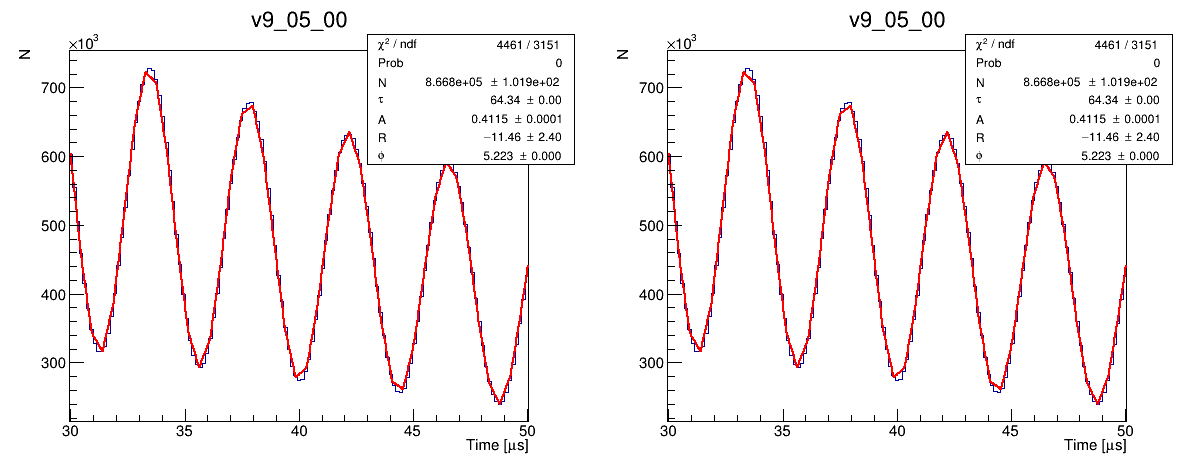

In [7]:
c4 = r.TCanvas("c4","c4",1200,500)
c4.Divide(int(len(versionPaths)),1)

histVec = []
for i, versionPath in enumerate(versionPaths):
    print(versionPath)
    f = r.TFile(versionPath+versionNumbers[i]+"_TmethodWiggleFitAllCalos.root")
    f.ls()
    keys = list(f.GetListOfKeys())
    print(keys)
    c = f.Get(keys[0].GetName())
    c.cd(0)
    prims = list(c.GetListOfPrimitives())
    print(prims)
    
    pad = prims[1].Clone()
    pad.SetDirectory(0)
    histVec.append(pad)
    
print(histVec)
    
for i in range(len(versionNumbers)):
    histVec[i].SetTitle(versionNumbers[i])
    c4.cd(i+1)
    histVec[i].Draw()
    
    
c4.Draw()

And the residuals

./images/v9_05_00/
[<ROOT.TKey object ("c1") at 0x7fffe7f0e000>]
[<ROOT.TFrame object ("TFrame") at 0x7fffe7ee1730>, <ROOT.TH1D object ("out_MAG P") at 0x7fffe7e61c20>, <ROOT.TPaveText object ("title") at 0x7fffe760eed0>]
./images/v9_05_00/
[<ROOT.TKey object ("c1") at 0x7fffe7ab59c0>]
[<ROOT.TFrame object ("TFrame") at 0x7fffe7ee3860>, <ROOT.TH1D object ("out_MAG P") at 0x7fffe7ee6640>, <ROOT.TPaveText object ("title") at 0x7fffe7e6dd00>]
[<ROOT.TH1D object ("out_MAG P") at 0x7fffe7e61020>, <ROOT.TH1D object ("out_MAG P") at 0x7fffe7ebe2e0>]
TFile**		./images/v9_05_00/v9_05_00_5ParamResiduals.root	
 TFile*		./images/v9_05_00/v9_05_00_5ParamResiduals.root	
  KEY: TCanvas	c1;1	c1
TFile**		./images/v9_05_00/v9_05_00_5ParamResiduals.root	
 TFile*		./images/v9_05_00/v9_05_00_5ParamResiduals.root	
  KEY: TCanvas	c1;1	c1


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4


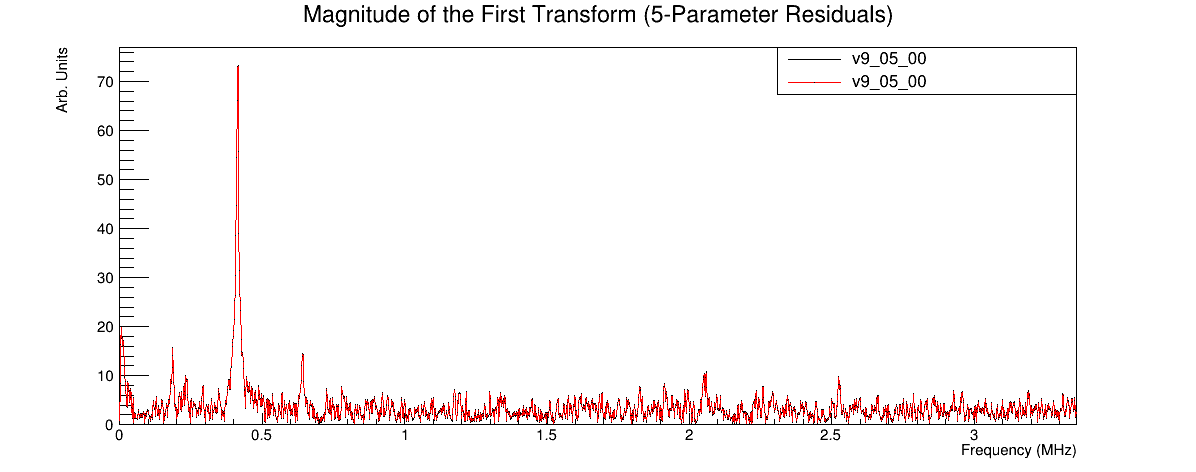

In [15]:
histVec = []
for i, versionPath in enumerate(versionPaths):
    print(versionPath)
    f = r.TFile(versionPath+versionNumbers[i]+"_5ParamResiduals.root")
    f.ls()
    keys = list(f.GetListOfKeys())
    print(keys)
    c = f.Get(keys[0].GetName())
    c.cd(0)
    prims = list(c.GetListOfPrimitives())
    print(prims)
    
    hist = prims[1].Clone()
    hist.SetDirectory(0)
    histVec.append(hist)
   

c4 = r.TCanvas("c4","c4",1200,500)
leg = r.TLegend(0.65,0.8,0.9,0.9)
print(histVec)
for i, hist in enumerate(histVec):
    
    hist.SetLineColor(i+1)
    
    if i < 0.5:
        hist.Draw("HIST P0 L")
    else:
        hist.Draw("HIST P0 L SAME")
    leg.AddEntry(hist,versionNumbers[i],"pl")

leg.Draw()
c4.Draw()

And now let's do the same for the 13-parameter fits

./images/v9_05_00/
[<ROOT.TKey object ("c1_n6") at 0x7fffe7e6f990>]
[<ROOT.TFrame object ("TFrame") at 0x7fffe7ab6800>, <ROOT.TH1D object ("out_MAG P") at 0x7fffe7d2f080>, <ROOT.TPaveText object ("title") at 0x7fffe7e9fa80>]
./images/v9_05_00/
[<ROOT.TKey object ("c1_n6") at 0x7fffe7ab5930>]
[<ROOT.TFrame object ("TFrame") at 0x7fffe782db00>, <ROOT.TH1D object ("out_MAG P") at 0x7fffe7ee1230>, <ROOT.TPaveText object ("title") at 0x7fffe7e6c490>]
[<ROOT.TH1D object ("out_MAG P") at 0x7fffe7e61020>, <ROOT.TH1D object ("out_MAG P") at 0x7fffe7ee6690>]
TFile**		./images/v9_05_00/v9_05_00_13ParamResiduals.root	
 TFile*		./images/v9_05_00/v9_05_00_13ParamResiduals.root	
  KEY: TCanvas	c1_n6;1	c1_n6
TFile**		./images/v9_05_00/v9_05_00_13ParamResiduals.root	
 TFile*		./images/v9_05_00/v9_05_00_13ParamResiduals.root	
  KEY: TCanvas	c1_n6;1	c1_n6


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4


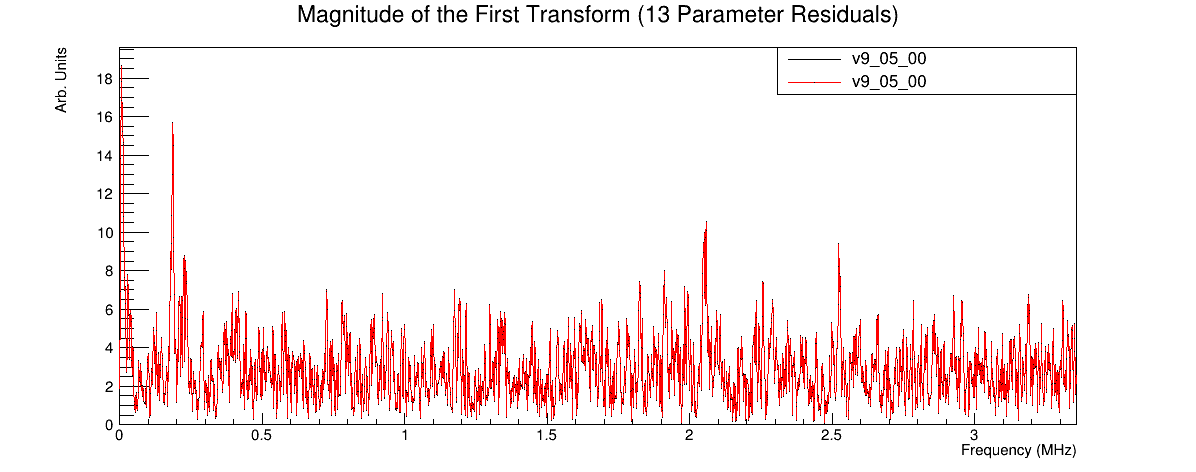

In [14]:
histVec = []
for i, versionPath in enumerate(versionPaths):
    print(versionPath)
    f = r.TFile(versionPath+versionNumbers[i]+"_13ParamResiduals.root")
    f.ls()
    keys = list(f.GetListOfKeys())
    print(keys)
    c = f.Get(keys[0].GetName())
    c.cd(0)
    prims = list(c.GetListOfPrimitives())
    print(prims)
    
    hist = prims[1].Clone()
    hist.SetDirectory(0)
    histVec.append(hist)
   

c4 = r.TCanvas("c4","c4",1200,500)
leg = r.TLegend(0.65,0.8,0.9,0.9)
print(histVec)
for i, hist in enumerate(histVec):
    
    hist.SetLineColor(i+1)
    
    if i < 0.5:
        hist.Draw("HIST P0 L")
    else:
        hist.Draw("HIST P0 L SAME")
    leg.AddEntry(hist,versionNumbers[i],"pl")

leg.Draw()
c4.Draw()